## Import

In [1]:
import pandas as pd
import numpy as np
import os
import json


from itertools import takewhile, dropwhile
from collections import Counter

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

import dataframes_util as ut

# Import base dataframe and controlled users

In [2]:
if (not os.path.isfile('../tweets.csv')):
    %run Tweet_preparation.ipynb

dfPosts = pd.read_csv('../tweets.csv',low_memory=False)

In [3]:
dfPosts

,id,id_str,created_at,user_id,user_screen_name,user_verified,user_created_at,text,source,coordinates,...,user_tweets_count,user_friends_count,user_followers_count,user_code_error,rt_user_code_error,in_reply_to_user_code_error,is_self_rt,user_url_cred,rt_user_url_cred,in_reply_to_user_url_cred
0,1311804409903484930,1311804409903484930,Thu Oct 01 23:05:18 +0000 2020,1035959506700783618,alessia_smile6,False,Sat Sep 01 18:36:08 +0000 2018,Altri tre giorni di blocco per aver citato un ...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
1,1311813787159130117,1311813787159130117,Thu Oct 01 23:42:33 +0000 2020,113584953,GiornaledPuglia,False,Fri Feb 12 09:11:24 +0000 2010,"Covid, vaccino AstraZeneca alla prova dell'Age...","<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
2,1311805637303644161,1311805637303644161,Thu Oct 01 23:10:10 +0000 2020,1279710942020984832,TestPerTutti,False,Sun Jul 05 09:37:48 +0000 2020,https://t.co/oQZpHUBKrt,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1.00,1.00,NaN
3,1311798617578049538,1311798617578049538,Thu Oct 01 22:42:17 +0000 2020,1215779772762148865,CapitanHarlok6,False,Fri Jan 10 23:37:56 +0000 2020,"""Dobbiamo resistere con il coltello tra i dent...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,0.90,NaN,NaN
4,1311806869917388801,1311806869917388801,Thu Oct 01 23:15:04 +0000 2020,2660808424,soteros1,False,Tue Jul 01 17:29:02 +0000 2014,Se volevate sapere perché Burioni viene invita...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,0.62,0.77,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053196,1394609996197937159,1394609996197937159,Tue May 18 11:05:08 +0000 2021,464822421,CiaoGrosso,False,Sun Jan 15 17:25:21 +0000 2012,Il medico testimonial pro vaccino a @Ariacheti...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,102577.0,1060.0,1114.0,NaN,NaN,NaN,False,0.33,1.00,NaN
4053197,1394610015823147011,1394610015823147011,Tue May 18 11:05:13 +0000 2021,497188910,Rosskitty77,False,Sun Feb 19 18:26:36 +0000 2012,"""...«Ha lividi e piastrine basse». E ha richie...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,79297.0,772.0,893.0,NaN,NaN,NaN,False,0.58,NaN,NaN
4053198,1394609887641022464,1394609887641022464,Tue May 18 11:04:42 +0000 2021,955571652468801536,GuidoIafrate,False,Mon Jan 22 22:43:30 +0000 2018,"Vaccinazioni nei luoghi di lavoro, fondamental...","<a href=""http://twitter.com/download/android"" ...",NaN,...,655.0,226.0,55.0,NaN,NaN,NaN,False,NaN,NaN,NaN
4053199,1394609899963830275,1394609899963830275,Tue May 18 11:04:45 +0000 2021,57358236,lucabattanta,False,Thu Jul 16 15:14:03 +0000 2009,A #lariachetira c’è un MEDICO DI BASE che ha a...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,517677.0,13671.0,20847.0,NaN,NaN,NaN,False,0.81,0.89,NaN


In [4]:
with open('listControlledUsers.json') as f:
    listControlledUsers = json.load(f)

## Filtered by retweet (with the same graph)

In [5]:
userNovax = listControlledUsers['Novax']
userProvax = listControlledUsers['Provax']

print ("Novax - Generation ",0, ": ",len(userNovax))
print ("Provax - Generation ",0, ": ",len(userProvax))

Novax - Generation  0 :  57
Provax - Generation  0 :  63


In [6]:
dfRetweet = ut.retweet_rate_novax(dfPosts,listControlledUsers['Novax'],listControlledUsers['Provax'])

In [12]:
dfRetweet

,novax,provax,sum,novax_perc,provax_perc
user_screen_name,,,,,
00000o0OOOO00,15,15,30,0.0,0.0
007Vincentxxx,11,11,22,0.0,0.0
0Zedda,8,8,16,0.0,0.0
10clarenc3,60,60,120,0.0,0.0
1205fiorella,18,18,36,0.0,0.0
...,...,...,...,...,...
zirudela,61,61,122,0.0,0.0
zittononcisto,5,5,10,0.0,0.0
zizionice,33,33,66,0.0,0.0


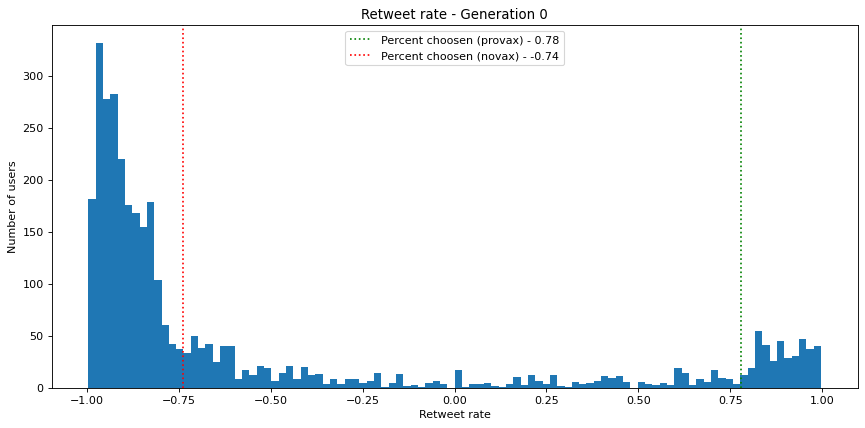

In [7]:
figure(figsize=(13, 6), dpi=80)
percent_choosen_provax = 0.78
percent_choosen_novax = -0.74


plt.hist(dfRetweet["provax_perc"],bins=100)
plt.axvline(percent_choosen_provax,color='green',ls=':',label="Percent choosen (provax) - %.2f"%percent_choosen_provax)
plt.axvline(percent_choosen_novax,color='red',ls=':',label="Percent choosen (novax) - %.2f"%percent_choosen_novax)


plt.xlabel('Retweet rate')
plt.ylabel("Number of users")
plt.title("Retweet rate - Generation 0")

plt.legend()
plt.show()

In [9]:
userNovax = userNovax + list(dfRetweet[dfRetweet['novax_perc']<=percent_choosen_novax].index)
userProvax = userProvax + list(dfRetweet[dfRetweet['provax_perc']>=percent_choosen_provax].index)

print ("Novax - Generation ",1, ": ",len(userNovax))
print ("Provax - Generation ",1, ": ",len(userProvax))

Novax - Generation  1 :  843
Provax - Generation  1 :  821


In [10]:
dfRetweet = ut.retweet_rate_novax(dfPosts,userNovax,userProvax)

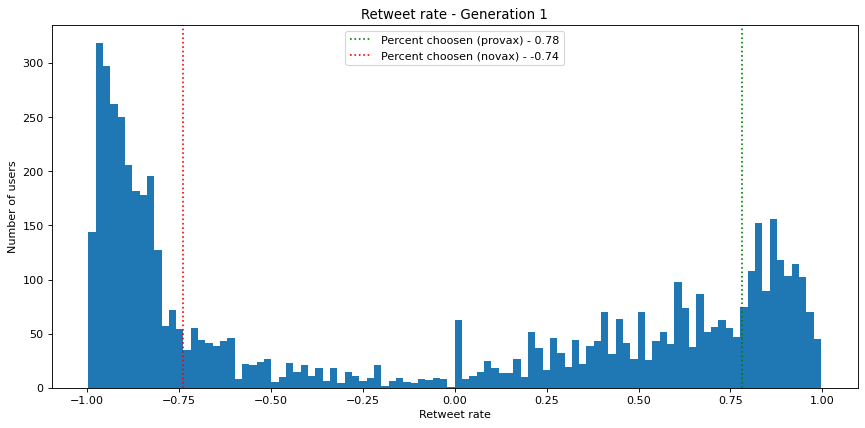

In [11]:
figure(figsize=(13, 6), dpi=80)
percent_choosen_provax = 0.78
percent_choosen_novax = -0.74


plt.hist(dfRetweet["provax_perc"],bins=100)
plt.axvline(percent_choosen_provax,color='green',ls=':',label="Percent choosen (provax) - %.2f"%percent_choosen_provax)
plt.axvline(percent_choosen_novax,color='red',ls=':',label="Percent choosen (novax) - %.2f"%percent_choosen_novax)


plt.xlabel('Retweet rate')
plt.ylabel("Number of users")
plt.title("Retweet rate - Generation 1")

plt.legend()
plt.show()

In [12]:
userNovax = userNovax + list(dfRetweet[dfRetweet['novax_perc']<=percent_choosen_novax].index)
userProvax = userProvax + list(dfRetweet[dfRetweet['provax_perc']>=percent_choosen_provax].index)

print ("Novax - Generation ",2, ": ",len(userNovax))
print ("Provax - Generation ",2, ": ",len(userProvax))

Novax - Generation  2 :  2067
Provax - Generation  2 :  1927


In [13]:
dfNovax = dfPosts[dfPosts.isin(userNovax)['user_screen_name']].copy()
dfProvax = dfPosts[dfPosts.isin(userProvax)['user_screen_name']].copy()

# .CSV Creation 

### Novax

In [14]:
dfNovax.drop_duplicates(['id'],inplace=True)
dfNovax

,id,id_str,created_at,user_id,user_screen_name,user_verified,user_created_at,text,source,coordinates,...,user_tweets_count,user_friends_count,user_followers_count,user_code_error,rt_user_code_error,in_reply_to_user_code_error,is_self_rt,user_url_cred,rt_user_url_cred,in_reply_to_user_url_cred
3,1311798617578049538,1311798617578049538,Thu Oct 01 22:42:17 +0000 2020,1215779772762148865,CapitanHarlok6,False,Fri Jan 10 23:37:56 +0000 2020,"""Dobbiamo resistere con il coltello tra i dent...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,0.90,NaN,NaN
45,1311817465949757440,1311817465949757440,Thu Oct 01 23:57:10 +0000 2020,541824556,MichelaRoi,False,Sat Mar 31 17:20:02 +0000 2012,Tamponi e vaccini antinfluenzali devono essere...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,0.94,NaN,NaN
51,1311813899818283013,1311813899818283013,Thu Oct 01 23:43:00 +0000 2020,791764138498387968,ilgrilloparlan2,False,Thu Oct 27 22:10:55 +0000 2016,L'agenzia europea del farmaco avvia l'esame su...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,0.87,1.00,NaN
96,1311796813624733698,1311796813624733698,Thu Oct 01 22:35:07 +0000 2020,934809157055799299,Nicola_Firenze,False,Sun Nov 26 15:40:45 +0000 2017,@La7tv Non tutti.\nSoprattutto la troppa liber...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1.00,NaN,1.0
111,1311787878305992705,1311787878305992705,Thu Oct 01 21:59:36 +0000 2020,969668587731456000,PatriziaOrlan11,False,Fri Mar 02 20:19:41 +0000 2018,Ma in che senso? #lombardia #vaccini #regionel...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,0.98,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053143,1394609762982146048,1394609762982146048,Tue May 18 11:04:12 +0000 2021,424084271,SoniaLaVera,False,Tue Nov 29 09:17:04 +0000 2011,@MinervaMcGrani1 @tommasomatic Ma certamente. ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,791059.0,11593.0,13343.0,NaN,NaN,NaN,False,0.44,0.89,NaN
4053149,1394609741897211910,1394609741897211910,Tue May 18 11:04:07 +0000 2021,424084271,SoniaLaVera,False,Tue Nov 29 09:17:04 +0000 2011,@valy_s @tommasomatic L’anno scorso non c’eran...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,791059.0,11593.0,13343.0,NaN,NaN,NaN,False,0.44,NaN,NaN
4053181,1394609980268072964,1394609980268072964,Tue May 18 11:05:04 +0000 2021,1322010178078859264,marchesaangeli,False,Fri Oct 30 02:59:31 +0000 2020,Anno 2018 - Intervista a Burioni sui vaccini c...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,83703.0,434.0,619.0,NaN,NaN,NaN,False,0.34,0.01,NaN
4053190,1394609810470055936,1394609810470055936,Tue May 18 11:04:24 +0000 2021,2820333045,OvileItalia,False,Thu Oct 09 19:45:14 +0000 2014,NON C’È VACCINO\n\n#ilmanifesto #laprima del 1...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,21508.0,231.0,190.0,NaN,NaN,NaN,False,0.83,NaN,NaN


### High credibility

In [15]:
dfProvax.drop_duplicates(['id'],inplace=True)
dfProvax

,id,id_str,created_at,user_id,user_screen_name,user_verified,user_created_at,text,source,coordinates,...,user_tweets_count,user_friends_count,user_followers_count,user_code_error,rt_user_code_error,in_reply_to_user_code_error,is_self_rt,user_url_cred,rt_user_url_cred,in_reply_to_user_url_cred
3,1311798617578049538,1311798617578049538,Thu Oct 01 22:42:17 +0000 2020,1215779772762148865,CapitanHarlok6,False,Fri Jan 10 23:37:56 +0000 2020,"""Dobbiamo resistere con il coltello tra i dent...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,0.90,NaN,NaN
45,1311817465949757440,1311817465949757440,Thu Oct 01 23:57:10 +0000 2020,541824556,MichelaRoi,False,Sat Mar 31 17:20:02 +0000 2012,Tamponi e vaccini antinfluenzali devono essere...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,0.94,NaN,NaN
51,1311813899818283013,1311813899818283013,Thu Oct 01 23:43:00 +0000 2020,791764138498387968,ilgrilloparlan2,False,Thu Oct 27 22:10:55 +0000 2016,L'agenzia europea del farmaco avvia l'esame su...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,0.87,1.0,NaN
96,1311796813624733698,1311796813624733698,Thu Oct 01 22:35:07 +0000 2020,934809157055799299,Nicola_Firenze,False,Sun Nov 26 15:40:45 +0000 2017,@La7tv Non tutti.\nSoprattutto la troppa liber...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1.00,NaN,1.0
111,1311787878305992705,1311787878305992705,Thu Oct 01 21:59:36 +0000 2020,969668587731456000,PatriziaOrlan11,False,Fri Mar 02 20:19:41 +0000 2018,Ma in che senso? #lombardia #vaccini #regionel...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,0.98,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053129,1394609558467788805,1394609558467788805,Tue May 18 11:03:23 +0000 2021,449849375,genovesergio76,False,Thu Dec 29 15:33:53 +0000 2011,ADDIO ASTRAZENECA - L’AUSTRIA HA DECISO DI ELI...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,151802.0,906.0,658.0,NaN,NaN,NaN,False,0.95,NaN,NaN
4053140,1394609477773627393,1394609477773627393,Tue May 18 11:03:04 +0000 2021,1233869697596174338,ciccionocera00s,False,Sat Feb 29 21:40:42 +0000 2020,#Vaccini: l'Austria abbandona AstraZeneca. E' ...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,43789.0,647.0,440.0,NaN,NaN,NaN,False,NaN,NaN,NaN
4053152,1394609650016870402,1394609650016870402,Tue May 18 11:03:45 +0000 2021,395218906,Corriere,True,Fri Oct 21 10:00:47 +0000 2011,"Vaccino, dopo il caso della 23enne un altro er...","<a href=""https://www.corriere.it"" rel=""nofollo...",NaN,...,476579.0,262.0,2389205.0,NaN,NaN,NaN,False,1.00,NaN,NaN
4053187,1394609981580840961,1394609981580840961,Tue May 18 11:05:04 +0000 2021,804354408,TgrRai,True,Wed Sep 05 10:56:01 +0000 2012,#vaccino Da oggi possono aderire alla #Campagn...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,251546.0,370.0,63681.0,NaN,NaN,NaN,False,1.00,1.0,NaN


### Other user

In [16]:
idNovax = dfNovax.groupby('id').first().index
dfOtherElem = dfPosts[dfPosts['id'].isin(idNovax) == False]

idProvax = dfProvax.groupby('id').first().index
dfOtherElem = dfOtherElem[dfOtherElem['id'].isin(idProvax) == False]

dfOtherElem

,id,id_str,created_at,user_id,user_screen_name,user_verified,user_created_at,text,source,coordinates,...,user_tweets_count,user_friends_count,user_followers_count,user_code_error,rt_user_code_error,in_reply_to_user_code_error,is_self_rt,user_url_cred,rt_user_url_cred,in_reply_to_user_url_cred
0,1311804409903484930,1311804409903484930,Thu Oct 01 23:05:18 +0000 2020,1035959506700783618,alessia_smile6,False,Sat Sep 01 18:36:08 +0000 2018,Altri tre giorni di blocco per aver citato un ...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
1,1311813787159130117,1311813787159130117,Thu Oct 01 23:42:33 +0000 2020,113584953,GiornaledPuglia,False,Fri Feb 12 09:11:24 +0000 2010,"Covid, vaccino AstraZeneca alla prova dell'Age...","<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
2,1311805637303644161,1311805637303644161,Thu Oct 01 23:10:10 +0000 2020,1279710942020984832,TestPerTutti,False,Sun Jul 05 09:37:48 +0000 2020,https://t.co/oQZpHUBKrt,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1.00,1.00,NaN
4,1311806869917388801,1311806869917388801,Thu Oct 01 23:15:04 +0000 2020,2660808424,soteros1,False,Tue Jul 01 17:29:02 +0000 2014,Se volevate sapere perché Burioni viene invita...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,0.62,0.77,NaN
5,1311806204973404161,1311806204973404161,Thu Oct 01 23:12:26 +0000 2020,607187088,Pattyjune22,False,Wed Jun 13 10:53:22 +0000 2012,"Il vaccino contro HPV è sicuro, efficace, grat...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053195,1394610031262306304,1394610031262306304,Tue May 18 11:05:16 +0000 2021,4309630395,Ileana0406,False,Sat Nov 28 18:18:40 +0000 2015,"Vaccini, nuovo errore di somministrazione in T...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,21105.0,1130.0,833.0,NaN,NaN,NaN,False,NaN,1.00,NaN
4053196,1394609996197937159,1394609996197937159,Tue May 18 11:05:08 +0000 2021,464822421,CiaoGrosso,False,Sun Jan 15 17:25:21 +0000 2012,Il medico testimonial pro vaccino a @Ariacheti...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,102577.0,1060.0,1114.0,NaN,NaN,NaN,False,0.33,1.00,NaN
4053197,1394610015823147011,1394610015823147011,Tue May 18 11:05:13 +0000 2021,497188910,Rosskitty77,False,Sun Feb 19 18:26:36 +0000 2012,"""...«Ha lividi e piastrine basse». E ha richie...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,79297.0,772.0,893.0,NaN,NaN,NaN,False,0.58,NaN,NaN
4053198,1394609887641022464,1394609887641022464,Tue May 18 11:04:42 +0000 2021,955571652468801536,GuidoIafrate,False,Mon Jan 22 22:43:30 +0000 2018,"Vaccinazioni nei luoghi di lavoro, fondamental...","<a href=""http://twitter.com/download/android"" ...",NaN,...,655.0,226.0,55.0,NaN,NaN,NaN,False,NaN,NaN,NaN


### Write dataframe to .csv

In [18]:
dfProvax.to_csv('retweet_class_same-graph/tweets_provax.csv', index=False)

In [19]:
dfNovax.to_csv('retweet_class_same-graph/tweets_novax.csv', index=False)

In [20]:
dfOtherElem.to_csv('retweet_class_same-graph/tweets_otherUser.csv', index=False)

In [21]:
#Extract to another dataframe info about doubled classified users
doubled_class = set(list(np.array(dfNovax['user_id'])[pd.Series(dfNovax['user_id']).isin(dfProvax['user_id'])]))
dfDoubled = dfPosts[dfPosts['user_id'].isin(doubled_class)]

dfDoubled.to_csv('retweet_class_same-graph/tweets_doubled_classified.csv', index=False)

In [22]:
len(doubled_class)

1291